In [15]:
#!pip install mlxtend
%matplotlib inline

## Import all the relevant libraries

In [17]:
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

# tensorflow
from tensorflow.keras import Sequential

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,InputLayer,MaxPool2D
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Helper functions

In [19]:
def magnitude(df):
    ax2 = df['Ax']**2
    ay2 = df['Ay']**2
    az2 = df['Az']**2
    am2 = ax2 + ay2 + az2
    
    gx2 = df['Gx']**2
    gy2 = df['Gy']**2
    gz2 = df['Gz']**2
    gm2 = gx2 + gy2 + gz2
    
    
    df['Am']=am2.apply(lambda x: math.sqrt(x)/4) 
    df['Gm']=gm2.apply(lambda x: math.sqrt(x)/500)
    
     #df['Pitch']=         math.atan2(df['Ay'][index],df['Az'][index])
      #   math.atan2(-df['Ax'][index], math.sqrt(df['Ay'][index]**2 +(df['Az'][index] **2)))

## collect
loads the data from the sample data files

In [20]:
def collect(i):
    x=pd.read_csv('kettlebell/'+str(i)+'.log',sep= "\t")
    return x.rename(columns={'ARoll':'Roll'})

## label_activity 
sets the label column for the dataset

In [21]:
def label_activity(df,label):
    df['Activity'] = label

## acc_scalar
normalize magnitude for the accelerometer and gyro values 

In [22]:
def acc_scalar(df):
    df['Axs'] = (df['Ax'].apply(lambda x:math.sqrt(x**2)/4))
    df['Ays'] = (df['Ay'].apply(lambda x:math.sqrt(x**2)/4))
    df['Azs'] = (df['Az'].apply(lambda x:math.sqrt(x**2)/4))
    df['Gxs'] = (df['Gx'].apply(lambda x:(x+500.0)/1000.0))
    df['Gys'] = (df['Gy'].apply(lambda x:(x+500.0)/1000.0))
    df['Gzs'] = (df['Gz'].apply(lambda x:(x+500.0)/1000.0))

## frequency
based on the timestamp calculate the sampling frequency

In [18]:
def frequency(df):
    df['Time_Delta_ms'] = (df['Time']-df['Time'].shift()).fillna(1000).astype(int)
    df['Hz'] = (1000/df['Time_Delta_ms']).astype(int)

# Import sample data

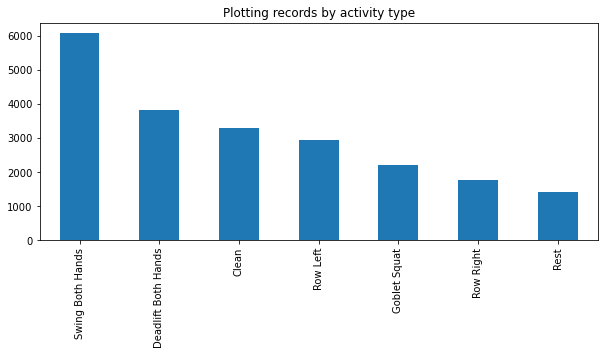

In [23]:
# import from files
df_row_left = pd.DataFrame().append([collect('row-left-1'),collect('row-left-2'),collect('row-left-3')],ignore_index=True)
df_row_right = pd.DataFrame().append([collect('row-right-1'),collect('row-right-2')],ignore_index=True)
df_clean = pd.DataFrame().append([collect('clean-1'),collect('clean-2')],ignore_index=True)
df_rest=collect('rest-1')
df_swing_both_hands = pd.DataFrame().append([collect('swing-both-hands-1'),collect('swing-both-hands-2'),collect('swing-both-hands-3')],ignore_index=True)
df_deadlift_both_hands=pd.DataFrame().append([collect('deadlift-both-hands-1'),collect('deadlift-both-hands-2')],ignore_index=True)
df_goblet_squat=pd.DataFrame().append([collect('goblet-squat-1'),collect('goblet-squat-2')],ignore_index=True)

# label individual activies
label_activity(df_row_right,"Row Right")
label_activity(df_row_left,"Row Left")
label_activity(df_rest,"Rest")
label_activity(df_swing_both_hands,"Swing Both Hands")
label_activity(df_deadlift_both_hands,"Deadlift Both Hands")
label_activity(df_goblet_squat,"Goblet Squat")
label_activity(df_clean,"Clean")

# new frame with with all the activities
df = pd.DataFrame()
df=df.append([df_row_right,df_row_left,df_rest,df_swing_both_hands,df_deadlift_both_hands,df_goblet_squat,df_clean])

# plot the datapoints pr activity
df['Activity'].value_counts().plot(kind='bar', title='Plotting records by activity type', figsize=(10, 4),align='center')